In [38]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os

#visualizing results
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#import yellowbrick as yb
plt.rcParams['figure.figsize'] = (15.0, 5.0) 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

Goal of analysis script is to explore data containing donations to Seattle City Council race. Focus on district #4

In [2]:
#name path for data file
path_contrib = 'C:/Users/Schindler/Documents/ProgrammingFun/iPythonScripts/democ_vouchures/contributors.csv'

In [3]:
#read in path_contrib, contains donation data
data_contrib = pd.read_csv(path_contrib)
data_contrib = pd.DataFrame(data = data_contrib)
print('Original data_contrib shape:\n', data_contrib.shape, '\n')
print('Original data_contrib missing value couts:\n', data_contrib.isnull().sum(), '\n')

Original data_contrib shape:
 (18735, 27) 

Original data_contrib missing value couts:
 intElectionCycle                        0
strContest                              0
strCampaignName                         0
strOrderName                            0
intCandidateLinkID_SEEC                 0
strTransactionType_SEEC                 0
strPDCFormLineNumber                    0
intLinkID_SEEC                          0
strTransactorName                     339
strCity                               366
strState                              371
strZip                                371
strEmployerName                     15858
strEmployerCity                     16376
strEmployerState                    16377
strOccupation                       16274
moneyAmount                             0
moneyAggregate                          0
moneyMisc1                              0
moneyMisc2                              0
strDescription                      18262
strTransactionDate            

In [4]:
#drop columns that are not of interest
columns_to_drop = ['intElectionCycle', 'strTransactionType_SEEC', 'strPDCFormLineNumber', 'moneyMisc1', 'moneyMisc2', 'strDescription', 
'strReportedDepositDate', 'moneyContributionsEffect_SEEC', 'moneyExpendituresEffect_SEEC']
data_contrib.drop(columns_to_drop, axis = 1, inplace=True)

#rename columns
data_contrib.rename(columns={'strContest': 'contest_name', 
                             'strCampaignName': 'campaign_name',
                             'strOrderName': 'candidate_name', 
                             'intCandidateLinkID_SEEC': 'candidate_id',
                             'intLinkID_SEEC': 'donor_id', 
                             'strTransactorName': 'donor_name', 
                             'strCity': 'donor_city', 
                             'strState': 'donor_state',
                             'strZip': 'donor_zip',
                             'strEmployerName': 'donor_employer', 
                             'strEmployerCity': 'donor_employer_city', 
                             'strEmployerState': 'donor_employer_state',
                             'strOccupation': 'donor_occ',
                             'moneyAmount': 'donation_amt', 
                             'moneyAggregate': 'donation_amt_agg',  
                             'strTransactionDate': 'donation_date',
                             'intCodedDistrict_SEEC': 'district',
                             'intDemocracyVoucherParticipantID': 'voucher_id'}, 
                    inplace=True)

print('Original data_contrib shape:\n', data_contrib.shape, '\n')
print('Original data_contrib missing value couts:\n', data_contrib.isnull().sum(), '\n')

Original data_contrib shape:
 (18735, 18) 

Original data_contrib missing value couts:
 contest_name                0
campaign_name               0
candidate_name              0
candidate_id                0
donor_id                    0
donor_name                339
donor_city                366
donor_state               371
donor_zip                 371
donor_employer          15858
donor_employer_city     16376
donor_employer_state    16377
donor_occ               16274
donation_amt                0
donation_amt_agg            0
donation_date               0
district                    0
voucher_id                  0
dtype: int64 



In [5]:
#make all entries in donor_city title case
data_contrib['donor_city'] = data_contrib['donor_city'].str.title().values

In [6]:
#create dictionary to store info: key is parameter name, value is sorted array of unique values for that parameter
data_contrib_dic = {}

#get parameter names
param_contrib = data_contrib.columns.values

#populate dictionary
for param in param_contrib:
    try:
        data_contrib_dic[param] = np.sort(data_contrib[param].unique())
    except:
        data_contrib_dic[param] = data_contrib[param].unique()

#convert dictionary into data frame (have to orient by index first because of unequal lengths)
datatypes_contrib = pd.DataFrame.from_dict(data_contrib_dic, orient='index').T

<function matplotlib.pyplot.show(*args, **kw)>

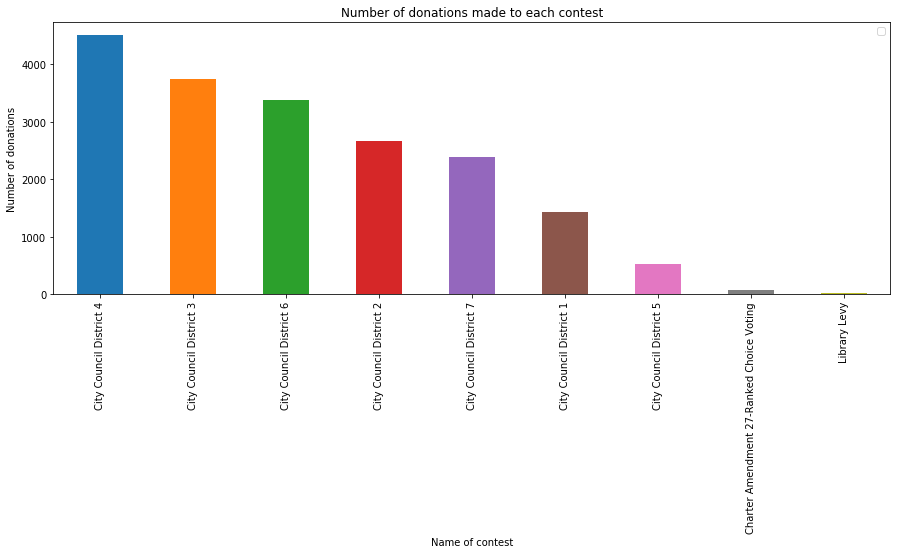

In [39]:
#viz of number of donations by race
ax = data_contrib['contest_name'].value_counts().plot(kind='bar')
plt.legend(())
ax.set_ylabel('Number of donations')
ax.set_xlabel('Name of contest')
ax.set_title('Number of donations made to each contest')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

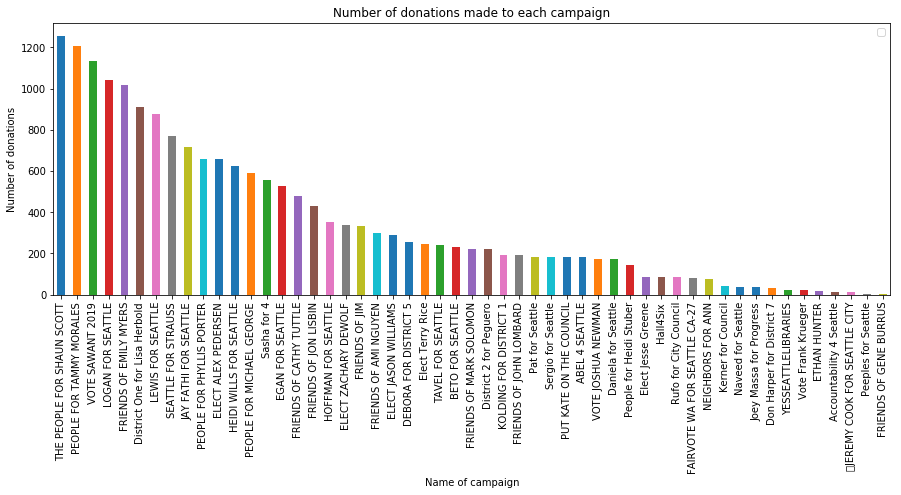

In [40]:
#viz of number of donations to each campaign
ax = data_contrib['campaign_name'].value_counts().plot(kind='bar')
plt.legend(())
ax.set_ylabel('Number of donations') 
ax.set_xlabel('Name of campaign')
ax.set_title('Number of donations made to each campaign')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

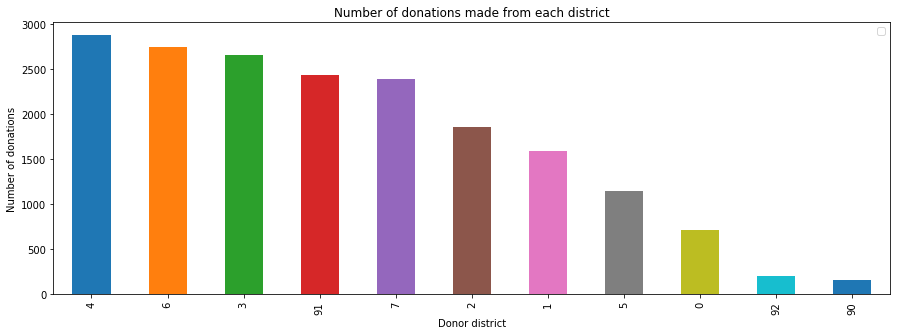

In [41]:
#viz of number of donations by district
ax = data_contrib['district'].value_counts().plot(kind='bar')
plt.legend(())
ax.set_ylabel('Number of donations') 
ax.set_xlabel('Donor district')
ax.set_title('Number of donations made from each district')
plt.show

In [10]:
#focus analysis on district 4 races
data_contrib_dist4 = data_contrib[data_contrib['contest_name'] == 'City Council District 4']
print(data_contrib_dist4.shape)
data_contrib_dist4.head()

(4504, 18)


,contest_name,campaign_name,candidate_name,candidate_id,donor_id,donor_name,donor_city,donor_state,donor_zip,donor_employer,donor_employer_city,donor_employer_state,donor_occ,donation_amt,donation_amt_agg,donation_date,district,voucher_id
7934,City Council District 4,Sasha for 4,Anderson,84762,84677,MARIKA VANDERSMITH,Seattle,WA,98115,HOMEMAKER,NaN,NaN,NaN,114.69,134.69,3/31/2019,4,0
7935,City Council District 4,Sasha for 4,Anderson,84762,84677,MARIKA VANDERSMITH,Seattle,WA,98115,HOMEMAKER,NaN,NaN,NaN,17.70,199.39,4/2/2019,4,0
7936,City Council District 4,Sasha for 4,Anderson,84762,84677,MARIKA VANDERSMITH,Seattle,WA,98115,HOMEMAKER,NaN,NaN,NaN,7.00,199.39,4/18/2019,4,0
7937,City Council District 4,Sasha for 4,Anderson,84762,84677,MARIKA VANDERSMITH,Seattle,WA,98115,HOMEMAKER,NaN,NaN,NaN,40.00,199.39,4/23/2019,4,0
7938,City Council District 4,Sasha for 4,Anderson,84762,86510,ALISSA BROOKS,Somerville,MA,2144,Jewish Vocational Services,Boston,MA,GRAPHIC DESIGNER,250.00,250.00,4/1/2019,91,0


<function matplotlib.pyplot.show(*args, **kw)>

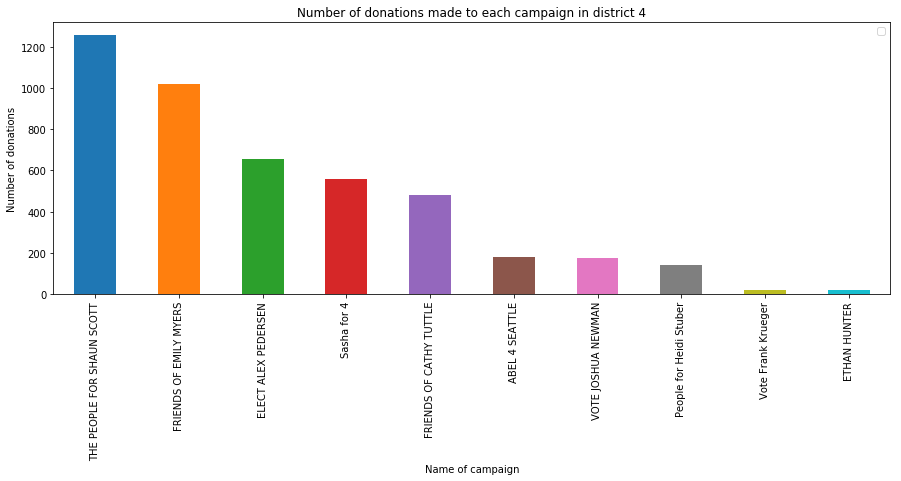

In [42]:
#viz donations to each campaign within district 4
ax = data_contrib_dist4['campaign_name'].value_counts().plot(kind='bar')
plt.legend(())
ax.set_ylabel('Number of donations')
ax.set_xlabel('Name of campaign')
ax.set_title('Number of donations made to each campaign in district 4')
plt.show

In [12]:
#check for synomymous entries per donor_city
data_contrib_dist4['donor_city'].value_counts().index.sort_values().values

array(['Acton', 'Addison', 'Alamo', 'Anaheim', 'Annandale', 'Arlington',
       'Atlanta', 'Austin', 'Australia', 'Bainbridge Island', 'Baltimore',
       'Beaverton', 'Bellevue', 'Bellingham', 'Berkeley', 'Boalsburg',
       'Boston', 'Bothell', 'Brea', 'Brier', 'Brightwood', 'Brinnon',
       'Brookline', 'Brooklyn', 'Buena Park', 'Burien', 'Cambridge',
       'Cannon Beach', 'Capitola', 'Carmichael', 'Carson City', 'Cary',
       'Cedaredge', 'Chapel Hill', 'Charlestown', 'Charlottesvle',
       'Chicago', 'Chico', 'China', 'Clyde Hill', 'Columbia', 'Columbus',
       'Corvallis', 'Costa Mesa', 'Cresskill', 'Cypress', 'Dallas',
       'Daly City', 'Dayton', 'Decatur', 'Denali Park', 'Des Moines',
       'Dublin', 'Duluth', 'Durango', 'Edmonds', 'El Segundo', 'Eugene',
       'Everett', 'Fairhope', 'Falls Church\n', 'Fargo', 'Flint',
       'Fullerton', 'Georgetown', 'Germany', 'Gibsonia', 'Glen Falls',
       'Glenmont', 'Grapevine', 'Green River', 'Greenville',
       'Hacienda Hei

In [13]:
#multiple entries corresponding to 'Seattle'
data_contrib_dist4.replace({'SEATTLETTLE': 'Seattle', 
                      'Seattle, WA': 'Seattle'}, inplace=True)

<function matplotlib.pyplot.show(*args, **kw)>

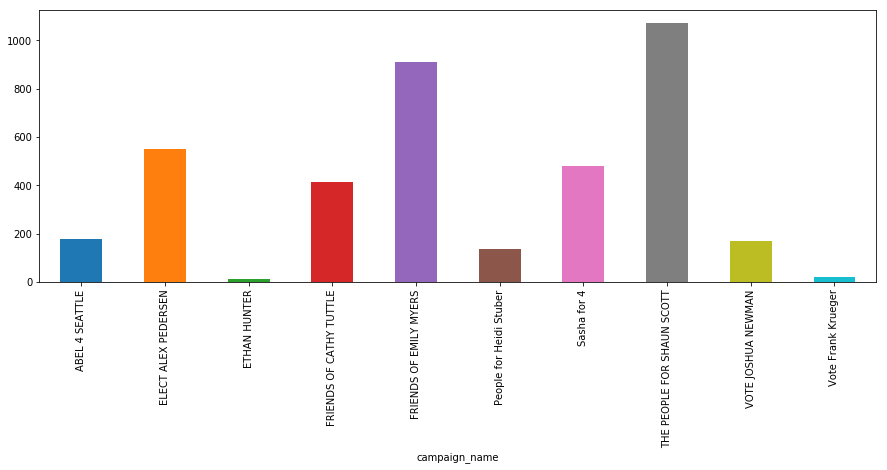

In [43]:
#determine number of unique campign contributions for each campaign in district 4
donor_id_by_campaign = data_contrib_dist4.groupby('campaign_name')['donor_id'].unique()
count = lambda x: len(x)
donor_id_by_campaign.apply(count).plot(kind='bar')
ax.set_ylabel('Number of unique donations')
ax.set_xlabel('Name of campaign')
ax.set_title('Number of unique donations made to each campaign in district 4')
plt.show

In [15]:
#focus on top 3 campaigns in district 4
data_contrib_dist4_top3 = data_contrib_dist4[(data_contrib_dist4['campaign_name'] == 'THE PEOPLE FOR SHAUN SCOTT') | 
                                            (data_contrib_dist4['campaign_name'] == 'FRIENDS OF EMILY MYERS') |
                                            (data_contrib_dist4['campaign_name'] == 'ELECT ALEX PEDERSEN')]
print(data_contrib_dist4_top3.shape)

#also focus analysis on donations from districts within Seattle e.g. 1-7
data_contrib_dist4_top3_Seattle = data_contrib_dist4_top3[(data_contrib_dist4_top3['district'] > 0) & (data_contrib_dist4_top3['district'] < 10)]
print(data_contrib_dist4_top3_Seattle.shape)

data_contrib_dist4_top3.head()

(2929, 18)
(2605, 18)


,contest_name,campaign_name,candidate_name,candidate_id,donor_id,donor_name,donor_city,donor_state,donor_zip,donor_employer,donor_employer_city,donor_employer_state,donor_occ,donation_amt,donation_amt_agg,donation_date,district,voucher_id
8531,City Council District 4,FRIENDS OF EMILY MYERS,Myers,84961,86936,Washington State Democrats,Seattle,WA,98194,NaN,NaN,NaN,NaN,250.0,250.0,2/10/2019,90,0
8532,City Council District 4,FRIENDS OF EMILY MYERS,Myers,84961,85903,Rigney Turnham,San Francisco,CA,94122,NaN,NaN,NaN,NaN,0.0,0.0,1/29/2019,91,0
8533,City Council District 4,FRIENDS OF EMILY MYERS,Myers,84961,84962,Jen Whiting,Austin,TX,78725,NaN,NaN,NaN,NaN,27.0,27.0,1/18/2019,91,0
8534,City Council District 4,FRIENDS OF EMILY MYERS,Myers,84961,84963,Joel Baca,Fullerton,CA,92831,NaN,NaN,NaN,NaN,10.0,10.0,1/18/2019,91,0
8535,City Council District 4,FRIENDS OF EMILY MYERS,Myers,84961,84963,Joel Baca,Fullerton,CA,92831,NaN,NaN,NaN,NaN,10.0,10.0,2/1/2019,91,0


<function matplotlib.pyplot.show(*args, **kw)>

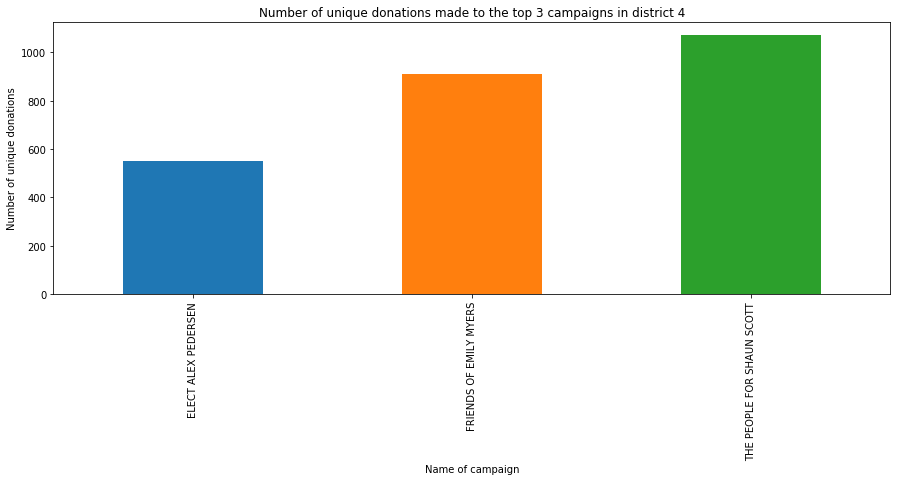

In [44]:
#determine number of unique campign contributions for top 3 campaigns in district 4
donor_id_by_campaign = data_contrib_dist4_top3.groupby('campaign_name')['donor_id'].unique()
count = lambda x: len(x)
ax = donor_id_by_campaign.apply(count).plot(kind='bar')
ax.set_ylabel('Number of unique donations')
ax.set_xlabel('Name of campaign')
ax.set_title('Number of unique donations made to the top 3 campaigns in district 4')
plt.show

In [17]:
#get number of donations made to each campaign given by donors in district 4 vs. rest of areas
donor_district_by_campaign_not4 = data_contrib_dist4_top3[data_contrib_dist4_top3['district'] != 4].groupby('campaign_name')['contest_name'].count()
donor_district_by_campaign_4only = data_contrib_dist4_top3[data_contrib_dist4_top3['district'] == 4].groupby('campaign_name')['contest_name'].count()

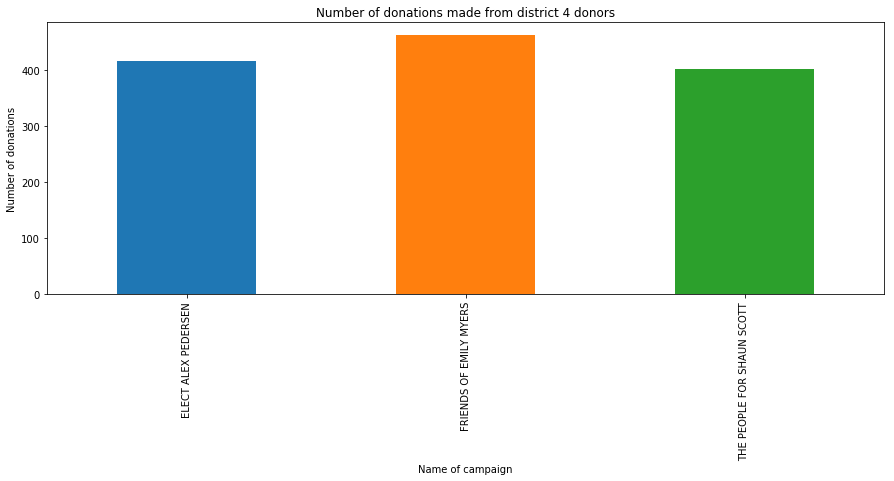

In [45]:
#viz number of donations to each campaign only made by donors from district 4
ax = donor_district_by_campaign_4only.plot(kind='bar')
ax.set_ylabel('Number of donations')
ax.set_xlabel('Name of campaign')
ax.set_title('Number of donations made from district 4 donors')
plt.show()

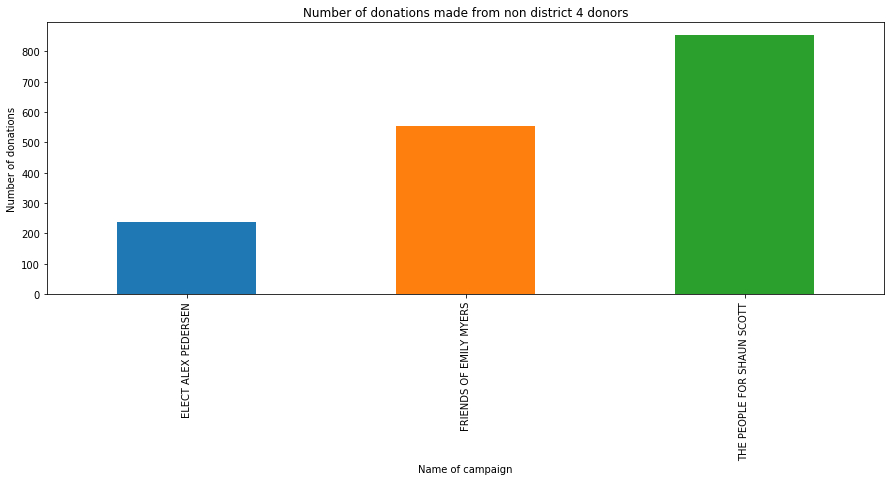

In [46]:
#viz number of donations to each campaign made by donors not from district 4
ax = donor_district_by_campaign_not4.plot(kind='bar')
ax.set_ylabel('Number of donations')
ax.set_xlabel('Name of campaign')
ax.set_title('Number of donations made from non district 4 donors')
plt.show()

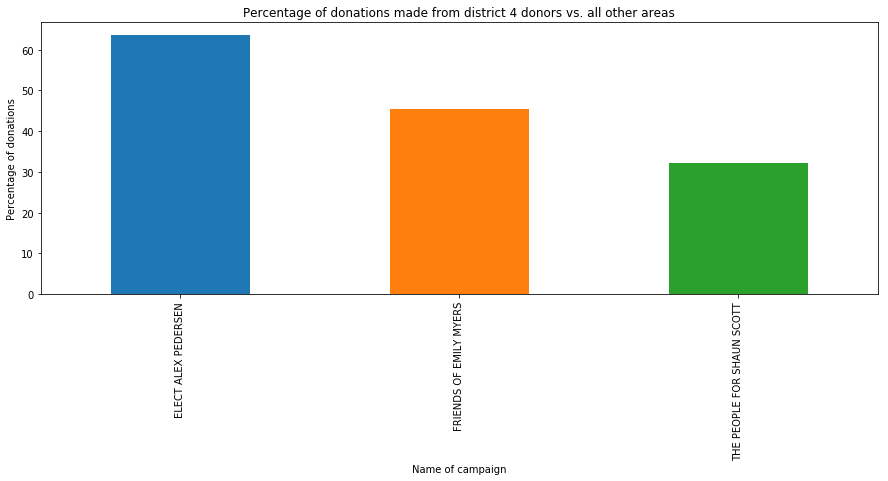

In [47]:
#viz percentage of donations to each campaign from district 4 vs. rest
ax = (donor_district_by_campaign_4only / (donor_district_by_campaign_not4 + donor_district_by_campaign_4only) * 100).plot(kind='bar')
ax.set_ylabel('Percentage of donations')
ax.set_xlabel('Name of campaign')
ax.set_title('Percentage of donations made from district 4 donors vs. all other areas')
plt.show()

In [21]:
#get sum of donation amount made to each campaign given by donors in district 4 vs. rest of areas
donation_amount_by_campaign_not4 = data_contrib_dist4_top3[data_contrib_dist4_top3['district'] != 4].groupby('campaign_name')['donation_amt'].sum()
donation_amount_by_campaign_4only = data_contrib_dist4_top3[data_contrib_dist4_top3['district'] == 4].groupby('campaign_name')['donation_amt'].sum()

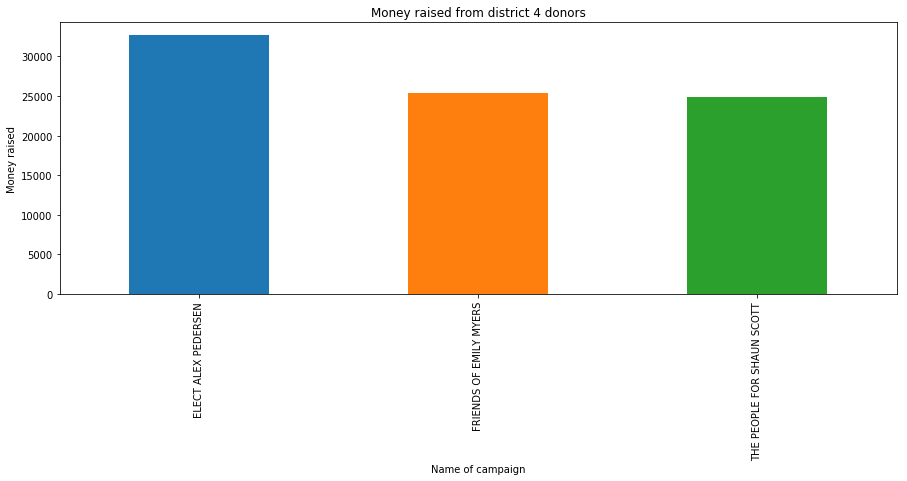

In [48]:
#viz total amount of donations to each campaign only made by donors from district 4
ax = donation_amount_by_campaign_4only.plot(kind='bar')
ax.set_ylabel('Money raised')
ax.set_xlabel('Name of campaign')
ax.set_title('Money raised from district 4 donors')
plt.show()

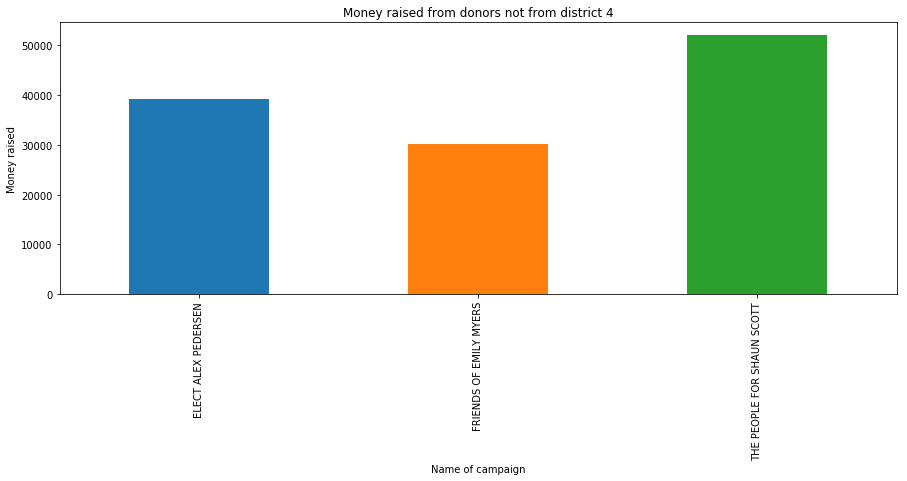

In [49]:
#viz total amount of donations to each campaign only made by donors not from district 4
ax = donation_amount_by_campaign_not4.plot(kind='bar')
ax.set_ylabel('Money raised')
ax.set_xlabel('Name of campaign')
ax.set_title('Money raised from donors not from district 4')
plt.show()

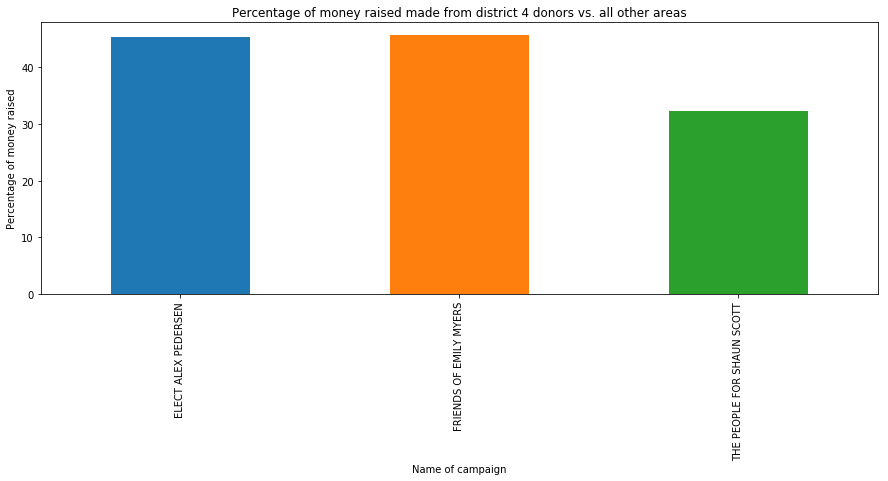

In [50]:
#viz percentage of amount of donations to each campaign from district 4 vs. rest
ax = (donation_amount_by_campaign_4only / (donation_amount_by_campaign_not4 + donation_amount_by_campaign_4only) * 100).plot(kind='bar')
ax.set_ylabel('Percentage of money raised')
ax.set_xlabel('Name of campaign')
ax.set_title('Percentage of money raised made from district 4 donors vs. all other areas')
plt.show()

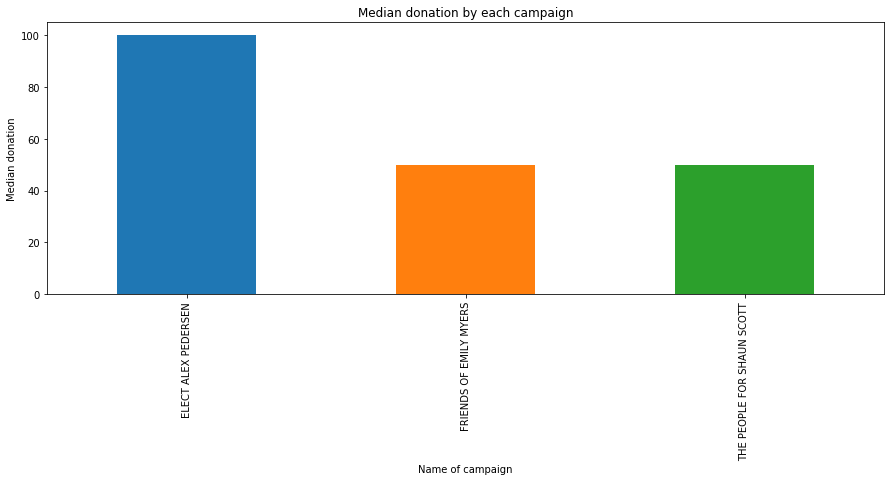

In [51]:
#viz median donation amount to each campaign
ax = data_contrib_dist4_top3.groupby('campaign_name')['donation_amt'].median().plot(kind='bar')
ax.set_ylabel('Median donation')
ax.set_xlabel('Name of campaign')
ax.set_title('Median donation by each campaign')
plt.show()

In [61]:
#determine how many donors gave all vs some democracy vouchers to Emily

unique_voucher_ids = data_contrib_dist4_top3['voucher_id'].unique()[1:] #skip first id (is na id)

Emily_count = {}
Alex_count = {}
Shaun_count = {}
voucher_count = {}

Emily_percent = []
Alex_percent = []
Shaun_percent = []

for voucher_id in unique_voucher_ids:
    #data frame for unique voucher_id
    voucher_id_df = data_contrib_dist4_top3[data_contrib_dist4_top3['voucher_id'] == voucher_id]
    
    #get voucher count for each campaign
    voucher_count[voucher_id] = voucher_id_df.shape[0]
    Emily_count[voucher_id] = voucher_id_df[voucher_id_df['campaign_name'] == 'FRIENDS OF EMILY MYERS']['voucher_id'].count()
    Alex_count[voucher_id] = voucher_id_df[voucher_id_df['campaign_name'] == 'ELECT ALEX PEDERSEN']['voucher_id'].count()
    Shaun_count[voucher_id] = voucher_id_df[voucher_id_df['campaign_name'] == 'THE PEOPLE FOR SHAUN SCOTT']['voucher_id'].count()
    
    #determine percentage of vouchers given to each campaign per each unique voucher id
    Emily_percent.append(Emily_count[voucher_id]/voucher_count[voucher_id]*100)
    Alex_percent.append(Alex_count[voucher_id]/voucher_count[voucher_id]*100)
    Shaun_percent.append(Shaun_count[voucher_id]/voucher_count[voucher_id]*100)

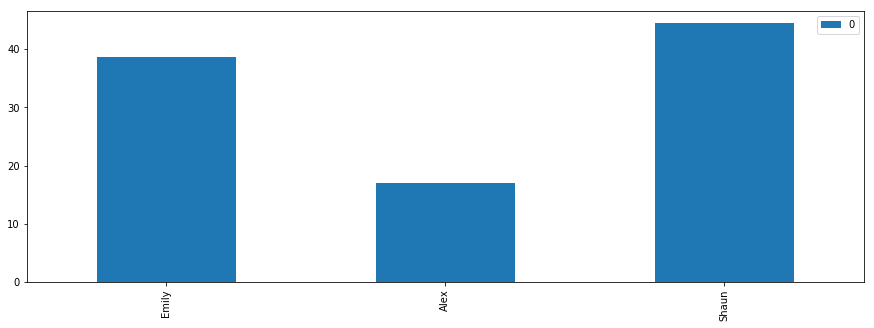

In [64]:
voucher_perc = {'Emily': np.mean(Emily_percent), 'Alex': np.mean(Alex_percent), 'Shaun': np.mean(Shaun_percent)}
pd.DataFrame.from_dict(data = voucher_perc, orient='index').plot(kind='bar')

In [ ]:
#save data frames as csvs to share with group memebers
reponse_by_id_df.to_csv('response_by_id.csv')
data_types_demog_prepost_df.to_csv('data_types_demog_prepost_df.csv')
data_types_MOSAIC_df.to_csv('data_types_MOSAIC_df.csv')
data_types_PF_df.to_csv('data_types_PF_df.csv')

In [ ]:
#feedback and address #1: there should not be nan's in the data_EMA_PF pf1-13 columns
#extract entries meeting this criteria for further inspection of original data entry
#save only rows with na values as new dataframe
data_EMA_PF_nan = data_EMA_PF[data_EMA_PF.isnull().any(axis = 1)]
data_EMA_PF_nan = data_EMA_PF_nan.loc[:, 'id':'pf13']
#we want to be able to see how many 'nan' there are so lets replace with 'NaN' so this keeps when we sort later on
data_EMA_PF_nan = data_EMA_PF_nan.replace(np.nan, 'NAN')
data_EMA_PF_nan.to_csv('data_EMA_PF_nan.csv')